<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Question-1:" data-toc-modified-id="Question-1:-1">Question 1:</a></span></li><li><span><a href="#Question-2:-Prediction---40-points" data-toc-modified-id="Question-2:-Prediction---40-points-2">Question 2: Prediction - 40 points</a></span></li><li><span><a href="#Question-3:-Ranking---30-points" data-toc-modified-id="Question-3:-Ranking---30-points-3">Question 3: Ranking - 30 points</a></span></li></ul></div>

In [166]:
import pandas as pd
import numpy as np
import scipy as sc
import seaborn as sns
import networkx
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support

import warnings
warnings.filterwarnings('ignore')

In [2]:
combats = pd.read_csv('combats.csv')
combats.head()

,First_pokemon,Second_pokemon,Winner
0,266,298,298
1,702,701,701
2,191,668,668
3,237,683,683
4,151,231,151


In [3]:
combats.shape

(50000, 3)

In [4]:
pokemon = pd.read_csv('pokemon.csv')
pokemon.head()

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,False


## Question 1:

In this part, you will explore the data to address the curiosities of the demanding Professor Oak.

1. (6 points) Explore the data and report some descriptive statistics (e.g., use df.describe(), report the number of classes, summarize the attack and defense distributions, etc.). This will be useful later in your analysis.

In [5]:
pokemon.describe()

,pid,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
count,800.0000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,400.5000,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500
std,231.0844,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474
min,1.0000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000
25%,200.7500,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000
50%,400.5000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000
75%,600.2500,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000
max,800.0000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000


In [6]:
pokemon.select_dtypes(include='object').describe().transpose().sort_values('unique')

,count,unique,top,freq
Class 1,800,18,Water,112
Class 2,414,18,Flying,97
Name,799,799,Mienshao,1


In [7]:
pokemon.shape

(800, 11)

In [8]:
pokemon['Class 1'].unique()

array(['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
       'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
       'Dragon', 'Dark', 'Steel', 'Flying'], dtype=object)

In [9]:
pokemon['Class 2'].unique()

array(['Poison', nan, 'Flying', 'Dragon', 'Ground', 'Fairy', 'Grass',
       'Fighting', 'Psychic', 'Steel', 'Ice', 'Rock', 'Dark', 'Water',
       'Electric', 'Fire', 'Ghost', 'Bug', 'Normal'], dtype=object)

In [10]:
diff_classes = pokemon['Class 2'].isin(pokemon['Class 1'])

In [49]:
# For all the classes together
classes = pd.DataFrame(pokemon['Class 1'].append(pokemon['Class 2']).value_counts())
classes.columns = ['Occurences']
classes.index.name = 'type'
classes

,Occurences
type,
Water,126
Normal,102
Flying,101
Grass,95
Psychic,90
Bug,72
Ground,67
Fire,64
Poison,62


**Attack and defense distribution**

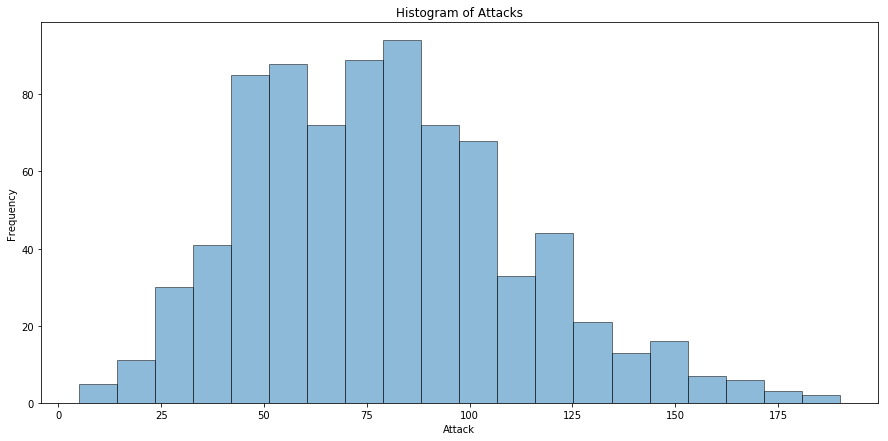

In [12]:
plt.figure(figsize=(15,7))
plt.hist(pokemon["Attack"], 20, edgecolor='black', alpha=0.5) # 20 bins
plt.xlabel('Attack')
plt.ylabel('Frequency')
plt.title('Histogram of Attacks')
plt.show()

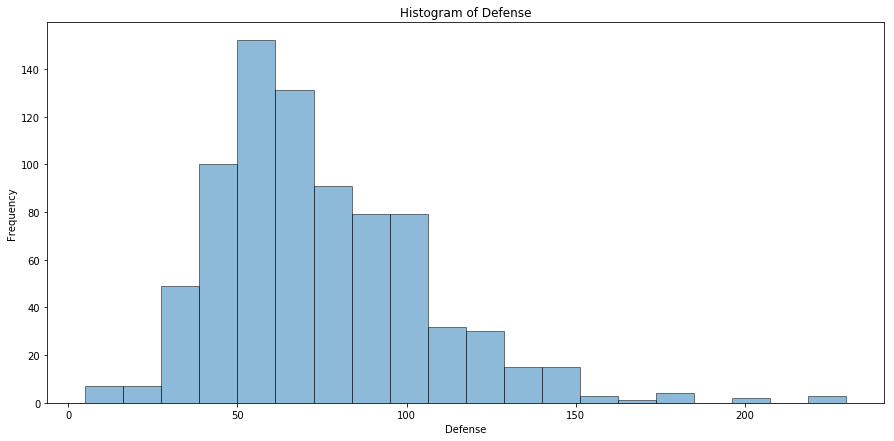

In [13]:
plt.figure(figsize=(15,7))
plt.hist(pokemon["Defense"], 20, edgecolor='black', alpha=0.5) # 20 bins
plt.xlabel('Defense')
plt.ylabel('Frequency')
plt.title('Histogram of Defense')
plt.show()

In [14]:
pokemon['Legendary'].value_counts()

False    735
True      65
Name: Legendary, dtype: int64

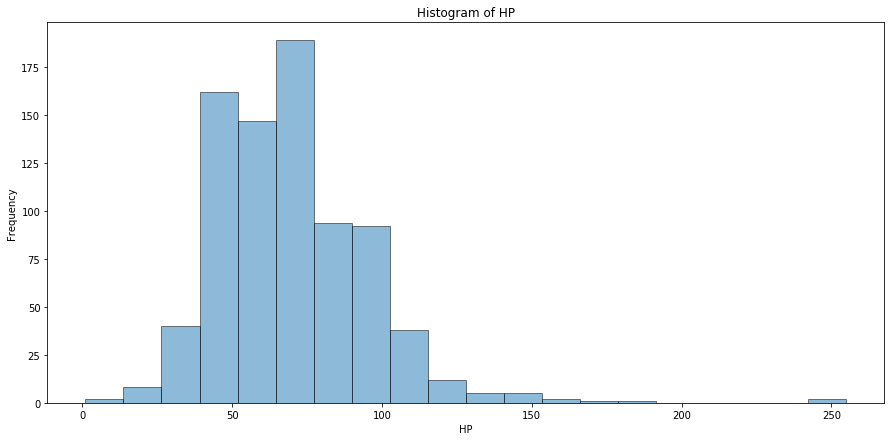

In [15]:
plt.figure(figsize=(15,7))
plt.hist(pokemon["HP"], 20, edgecolor='black', alpha=0.5) # 20 bins
plt.xlabel('HP')
plt.ylabel('Frequency')
plt.title('Histogram of HP')
plt.show()

2. (4 points) Compare the probability distribution of the “regular attack” feature with that of the “regular defense” feature. In particular,
   1. visualize the relation between these two variables using an appropriate plot;
   2. list the names of the 3 Pokémon with highest attack-over-defense ratio;
   3. list the names of the 3 Pokémon with lowest attack-over-defense ratio;
   4. list the names of the 10 Pokémon with the largest number of victories.

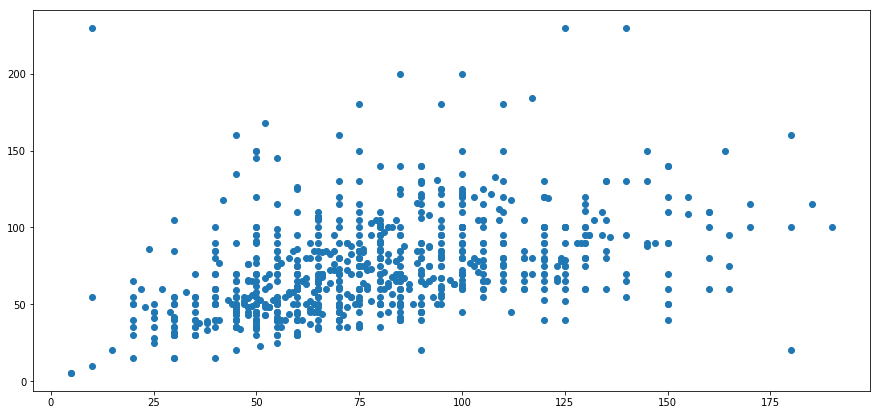

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))
plt.scatter(pokemon['Attack'], pokemon['Defense'])
plt.show()

In [17]:
pokemon['Attack'].isnull().value_counts()

False    800
Name: Attack, dtype: int64

In [18]:
pokemon['Defense'].isnull().value_counts()

False    800
Name: Defense, dtype: int64

In [19]:
pokemon[pokemon['Defense'].isin([0])]

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary


In [20]:
pokemon['Attack Defense Ratio'] = pokemon['Attack']/pokemon['Defense']

In [21]:
pokemon_sorted_ratio=pokemon.sort_values(ascending=False, by=['Attack Defense Ratio'])
pokemon_sorted_ratio[['Name']].head(3)
#df.loc[df['favcount'].idxmax(), 'sn']

,Name
429,DeoxysAttack Forme
347,Carvanha
19,Mega Beedrill


In [22]:
pokemon_sorted_ratio[['Name']].tail(3)

,Name
484,Bronzor
139,Magikarp
230,Shuckle


In [23]:
winner_ids=combats['Winner'].value_counts()
winner_ids = pd.DataFrame({'pid':winner_ids.index,'count':winner_ids.values})
winner_ids.head()

,pid,count
0,163,152
1,154,136
2,438,136
3,428,134
4,432,133


In [24]:
#merging part_categories and data_ids to get the names of the parts
winner_ids_and_pokemon=pokemon.merge(winner_ids).sort_values(ascending=False, by=['count'])
winner_ids_and_pokemon.head(10)

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,Attack Defense Ratio,count
155,163,Mewtwo,Psychic,NaN,106,110,90,154,90,130,True,1.222222,152
146,154,Aerodactyl,Rock,Flying,80,105,65,60,75,130,False,1.615385,136
425,438,Infernape,Fire,Fighting,76,104,71,104,71,108,False,1.464789,136
415,428,Jirachi,Steel,Psychic,100,100,100,100,100,100,True,1.000000,134
419,432,Deoxys Speed Forme,Psychic,NaN,50,95,90,95,90,180,True,1.055556,133
303,314,Slaking,Normal,NaN,150,160,100,95,65,100,False,1.600000,133
205,214,Murkrow,Dark,Flying,60,85,42,85,42,91,False,2.023810,130
382,394,Mega Absol,Dark,NaN,65,150,60,115,60,115,False,2.500000,130
238,249,Mega Houndoom,Dark,Fire,75,90,90,140,90,115,False,1.000000,128
147,155,Mega Aerodactyl,Rock,Flying,80,135,85,70,95,150,False,1.588235,127


3. (10 points) Professor Oak suspects that Pokémon in the _grass_ class have a stronger regular attack than those in the _rock_ class. Check if he is right and convince him of your conclusion with statistical arguments.
   Note: If there are Pokémon that are in both classes, discard them.
   Note: You may assume that the distribution of the regular attack feature is normal for all Pokémon classes.

In [25]:
pokemon['Class 1'].isnull().value_counts()

False    800
Name: Class 1, dtype: int64

In [26]:
pokemon_class_merged= pokemon.copy()
to_drop = pokemon[pokemon['Class 2'].notnull()].index
pokemon_class_merged.drop(to_drop, inplace=True)
pokemon_class_merged.drop(columns = ['Class 2'], inplace = True)
pokemon_class_merged.head()

,pid,Name,Class 1,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,Attack Defense Ratio
4,5,Charmander,Fire,39,52,43,60,50,65,False,1.209302
5,6,Charmeleon,Fire,58,64,58,80,65,80,False,1.103448
9,10,Squirtle,Water,44,48,65,50,64,43,False,0.738462
10,11,Wartortle,Water,59,63,80,65,80,58,False,0.787500
11,12,Blastoise,Water,79,83,100,85,105,78,False,0.830000


In [27]:
pokemon_attack_class_agg= pokemon_class_merged[['Class 1', 'Attack']].groupby(['Class 1']).sum()
pokemon_attack_class_agg.head()

,Attack
Class 1,
Bug,856
Dark,888
Dragon,1014
Electric,1869
Fairy,956


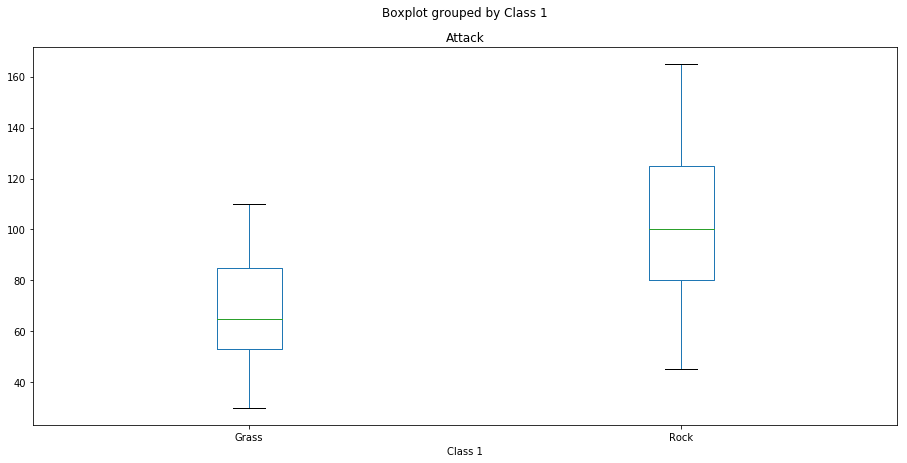

In [28]:
pokemon_class_merged1 = pokemon_class_merged[(pokemon_class_merged['Class 1'] == 'Grass') | (pokemon_class_merged['Class 1'] == 'Rock')]
pokemon_class_merged1.boxplot(by='Class 1', column=['Attack'], grid=False, figsize=(15,7))

4. (10 points) Professor Oak reveals to you that he has built a backdoor into every Pokedex in the world and that he is secretly dumping the memory of all devices to his servers. He expects to have the records of 1 billion combats soon, and one machine won’t be enough to handle all this data, so he wants you to use Spark. Your task: Solve problem 2iv above (“list the names of the 10 Pokémon with the largest number of victories”) with a Spark implementation in Python. The output should be a Python list with 10 names sorted in descending order of number of victories.
   Note: You don’t need to run the Spark code -- just list it! You should assume that you have two DataFrames (already loaded) called `pokemon` and `combats`, with the same schema as the small CSV files you’ve been working with above.

In [ ]:
combats_counts = combats.groupBy("Winner").agg(count("*").alias("WinnerCount"))
combats_pokemon_joined = pokemon.join(combats_counts, combats_counts.index == pokemon.pid).sort(desc("WinnerCount"))
combats_pokemon_joined = combats_pokemon_joined.take(10).toPandas()['Name'].values

## Question 2: Prediction - 40 points
Now that you know what your data looks like, you are ready to implement the prediction model for the Pokedex 2.0. The model should take as input the features of two Pokémon and generate a binary value to predict who will win.

1. (3 points) Generate the feature vectors and the labels to train your model.


In [112]:
merged_with_1st_pok = combats.merge(pokemon, how = 'inner', left_on = 'First_pokemon', right_on= 'pid')
merged_with_2nd_pok = merged_with_1st_pok.merge(pokemon, how = 'inner', left_on = 'Second_pokemon', right_on= 'pid')
merged_with_2nd_pok

,First_pokemon,Second_pokemon,Winner,pid_x,Name_x,Class 1_x,Class 2_x,HP_x,Attack_x,Defense_x,...,Class 1_y,Class 2_y,HP_y,Attack_y,Defense_y,Sp. Atk_y,Sp. Def_y,Speed_y,Legendary_y,Attack Defense Ratio_y
0,266,298,298,266,Larvitar,Rock,Ground,50,64,50,...,Grass,Dark,70,70,40,60,40,60,False,1.75
1,73,298,298,73,Machop,Fighting,NaN,70,80,50,...,Grass,Dark,70,70,40,60,40,60,False,1.75
2,373,298,298,373,Whiscash,Water,Ground,110,78,73,...,Grass,Dark,70,70,40,60,40,60,False,1.75
3,536,298,536,536,Fan Rotom,Electric,Flying,50,65,107,...,Grass,Dark,70,70,40,60,40,60,False,1.75
4,368,298,368,368,Zangoose,Normal,NaN,73,115,60,...,Grass,Dark,70,70,40,60,40,60,False,1.75
5,659,298,298,659,Ferroseed,Grass,Steel,44,50,91,...,Grass,Dark,70,70,40,60,40,60,False,1.75
6,736,298,736,736,Litleo,Fire,Normal,62,50,58,...,Grass,Dark,70,70,40,60,40,60,False,1.75
7,638,298,638,638,Gothitelle,Psychic,NaN,70,55,95,...,Grass,Dark,70,70,40,60,40,60,False,1.75
8,129,298,129,129,Seaking,Water,NaN,80,92,65,...,Grass,Dark,70,70,40,60,40,60,False,1.75
9,517,298,298,517,Tangrowth,Grass,NaN,100,100,125,...,Grass,Dark,70,70,40,60,40,60,False,1.75


In [113]:
merged_with_2nd_pok.drop(columns = ['pid_x', 'pid_y', 'Name_x', 'Name_y'], inplace = True)

In [114]:
merged_with_2nd_pok.head()

,First_pokemon,Second_pokemon,Winner,Class 1_x,Class 2_x,HP_x,Attack_x,Defense_x,Sp. Atk_x,Sp. Def_x,...,Class 1_y,Class 2_y,HP_y,Attack_y,Defense_y,Sp. Atk_y,Sp. Def_y,Speed_y,Legendary_y,Attack Defense Ratio_y
0,266,298,298,Rock,Ground,50,64,50,45,50,...,Grass,Dark,70,70,40,60,40,60,False,1.75
1,73,298,298,Fighting,NaN,70,80,50,35,35,...,Grass,Dark,70,70,40,60,40,60,False,1.75
2,373,298,298,Water,Ground,110,78,73,76,71,...,Grass,Dark,70,70,40,60,40,60,False,1.75
3,536,298,536,Electric,Flying,50,65,107,105,107,...,Grass,Dark,70,70,40,60,40,60,False,1.75
4,368,298,368,Normal,NaN,73,115,60,60,60,...,Grass,Dark,70,70,40,60,40,60,False,1.75


2. (5 points) How does your model handle categorical features and Pokémon with multiple classes?

In [115]:
combats_label_and_feat = merged_with_2nd_pok
print(combats_label_and_feat.select_dtypes(include = 'object').columns)

Index(['Class 1_x', 'Class 2_x', 'Class 1_y', 'Class 2_y'], dtype='object')


In [116]:
combats_label_and_feat['Class 2_x'] = combats_label_and_feat['Class 2_x'].fillna('0')
combats_label_and_feat['Class 2_y'] = combats_label_and_feat['Class 2_y'].fillna('0')

In [117]:
classes.loc['0']=0
classes

,Occurences
type,
Water,126
Normal,102
Flying,101
Grass,95
Psychic,90
Bug,72
Ground,67
Fire,64
Poison,62


In [118]:
from sklearn.preprocessing import LabelEncoder
lab_enc = LabelEncoder()
lab_enc.fit(classes.index)
class1x = lab_enc.transform(combats_label_and_feat['Class 1_x'])
combats_label_and_feat['Class 1_x']=class1x
combats_label_and_feat[['Class 1_x']].head(3)

,Class 1_x
0,16
1,6
2,18


In [119]:
class1y = lab_enc.transform(combats_label_and_feat['Class 1_y'])
combats_label_and_feat['Class 1_y']=class1y
class2x = lab_enc.transform(combats_label_and_feat['Class 2_x'])
combats_label_and_feat['Class 2_x']=class2x
class2y = lab_enc.transform(combats_label_and_feat['Class 2_y'])
combats_label_and_feat['Class 2_y']=class2y
combats_label_and_feat.head()

,First_pokemon,Second_pokemon,Winner,Class 1_x,Class 2_x,HP_x,Attack_x,Defense_x,Sp. Atk_x,Sp. Def_x,...,Class 1_y,Class 2_y,HP_y,Attack_y,Defense_y,Sp. Atk_y,Sp. Def_y,Speed_y,Legendary_y,Attack Defense Ratio_y
0,266,298,298,16,11,50,64,50,45,50,...,10,2,70,70,40,60,40,60,False,1.75
1,73,298,298,6,0,70,80,50,35,35,...,10,2,70,70,40,60,40,60,False,1.75
2,373,298,298,18,11,110,78,73,76,71,...,10,2,70,70,40,60,40,60,False,1.75
3,536,298,536,4,8,50,65,107,105,107,...,10,2,70,70,40,60,40,60,False,1.75
4,368,298,368,13,0,73,115,60,60,60,...,10,2,70,70,40,60,40,60,False,1.75


In [120]:
lab_enc = LabelEncoder()
legendary1 = lab_enc.fit_transform(combats_label_and_feat['Legendary_x'])
combats_label_and_feat['Legendary_x']=legendary1
legendary2 = lab_enc.fit_transform(combats_label_and_feat['Legendary_y'])
combats_label_and_feat['Legendary_y']=legendary2

In [121]:
combats_label_and_feat.head()

,First_pokemon,Second_pokemon,Winner,Class 1_x,Class 2_x,HP_x,Attack_x,Defense_x,Sp. Atk_x,Sp. Def_x,...,Class 1_y,Class 2_y,HP_y,Attack_y,Defense_y,Sp. Atk_y,Sp. Def_y,Speed_y,Legendary_y,Attack Defense Ratio_y
0,266,298,298,16,11,50,64,50,45,50,...,10,2,70,70,40,60,40,60,0,1.75
1,73,298,298,6,0,70,80,50,35,35,...,10,2,70,70,40,60,40,60,0,1.75
2,373,298,298,18,11,110,78,73,76,71,...,10,2,70,70,40,60,40,60,0,1.75
3,536,298,536,4,8,50,65,107,105,107,...,10,2,70,70,40,60,40,60,0,1.75
4,368,298,368,13,0,73,115,60,60,60,...,10,2,70,70,40,60,40,60,0,1.75


In [122]:
combats_label_and_feat['outcome'] = np.where(combats_label_and_feat['Winner']==combats_label_and_feat['First_pokemon'], 1, 0)
combats_label_and_feat.drop(columns = 'Winner', inplace = True)

3. (10 points) Train a random forest to predict the winner of a match based on the available features. To do so, split the full dataset randomly into a training set (90%) and a testing set (10%), and try different values of the number of estimators (`n_estimators`, try values 10, 25, 50, 100) and the maximum tree depth (`max_depth`, try values 2, 4, 10). Do this manually, without using any scikit-learn helpers.

In [123]:
def split_data(tx, ty, ratio, seed=1):
    '''
    Split the training data by ratio.
    '''
    np.random.seed(seed)
    split_idxs = [i for i in range(len(tx))]
    
    # Shuffle the indicies randomly
    np.random.shuffle(split_idxs)
    tx_shuffled = tx[split_idxs]
    ty_shuffled = ty[split_idxs]
    
    # Split by ratio
    split_pos = int(len(tx) * ratio)
    x_train = tx_shuffled[:split_pos]
    x_test = tx_shuffled[split_pos:]
    y_train = ty_shuffled[:split_pos]
    y_test = ty_shuffled[split_pos:]
    
    return x_train, y_train, x_test, y_test 

In [124]:
combats_label_and_feat.drop(columns= ['Attack Defense Ratio_x', 'Attack Defense Ratio_y'], inplace = True)
target = combats_label_and_feat['outcome']
combats_label_and_feat.drop(columns= ['outcome'], inplace = True)
features = combats_label_and_feat

In [129]:
X = features.values
Y = target.values
X_train, y_train, X_test, y_test = split_data(X, Y, 0.9, seed=1)

In [131]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
n_estimators = [10, 25, 50, 100]
n_max_depths = [2, 4, 10]
results = []
for estimator in n_estimators:
    for depth in n_max_depths:
        model = RandomForestClassifier(n_estimators=estimator, max_depth=depth)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_pred, y_test)
        results.append([estimator, depth, accuracy])

        print('** For n_estimators = ', estimator, 'and max_depth = ', depth,
              '**')
        print('accuracy is ', accuracy)

** For n_estimators =  10 and max_depth =  2 **
accuracy is  0.7988
** For n_estimators =  10 and max_depth =  4 **
accuracy is  0.8502
** For n_estimators =  10 and max_depth =  10 **
accuracy is  0.929
** For n_estimators =  25 and max_depth =  2 **
accuracy is  0.8112
** For n_estimators =  25 and max_depth =  4 **
accuracy is  0.8744
** For n_estimators =  25 and max_depth =  10 **
accuracy is  0.9246
** For n_estimators =  50 and max_depth =  2 **
accuracy is  0.814
** For n_estimators =  50 and max_depth =  4 **
accuracy is  0.8544
** For n_estimators =  50 and max_depth =  10 **
accuracy is  0.929
** For n_estimators =  100 and max_depth =  2 **
accuracy is  0.8178
** For n_estimators =  100 and max_depth =  4 **
accuracy is  0.8706
** For n_estimators =  100 and max_depth =  10 **
accuracy is  0.9302


In [132]:
pd.DataFrame(results, columns=['n_estimators', 'n_max_depths', 'accuracy']).sort_values('accuracy', ascending=False)

,n_estimators,n_max_depths,accuracy
11,100,10,0.9302
2,10,10,0.9290
8,50,10,0.9290
5,25,10,0.9246
4,25,4,0.8744
10,100,4,0.8706
7,50,4,0.8544
1,10,4,0.8502
9,100,2,0.8178
6,50,2,0.8140


4. (5 points) Summarize and describe the results you obtain when training on 90% and testing on 10% of the data. What is the best combination of the two hyperparameters (number of estimators and maximum tree depth)?

Best combination is n_estimators = 100 and n_max_depths = 10.

5. (5 points) Could the above training/testing setup potentially lead to wrong conclusions regarding the best hyperparameter setting? If so, describe why, and how you would address the problem. (Hint: think about how you’re making use of the data during training and testing).


Yes, because it isn't necessarily close to the true distribution of our model, and we could get problems such as overfitting. Moreover, in just splitting into test and training set, the data may not be split randomly. With cross validation we test on every batch of the data in order to avoid overfitting.

6. (7 points) Implement your solution to the problem you’ve identified in the previous subquestion (5), and show and describe your results.

In [138]:
def build_k_indices(y, k_fold, seed):
    """build k indices for k-fold."""
    num_row = y.shape[0]
    interval = int(num_row / k_fold)
    np.random.seed(seed)
    indices = np.random.permutation(num_row)
    k_indices = [indices[k * interval: (k + 1) * interval] for k in range(k_fold)]
    return np.array(k_indices)

def cross_validation(y, x,k_fold,estimator,depth):
    """returns the precision and recalls mean after cross validation."""
    
    k_indices = build_k_indices(y, k_fold, 2)
    precisions = []
    recalls = []
    accuracies = []
    for k in range(k_fold):
        # get k'th subgroup in test, others in train
        te_indice = k_indices[k]
        tr_indice = k_indices[~(np.arange(k_indices.shape[0]) == k)]
        tr_indice = tr_indice.reshape(-1)
        y_te = y[te_indice]
        y_tr = y[tr_indice]
        x_te = x[te_indice]
        x_tr = x[tr_indice]
        
#         means=np.mean(x_tr, axis=0)
#         stds=np.std(x_tr, axis=0)

#         x_tr= standardize(x_tr)
#         x_te = standardize(x_te)
        
        # Training a random forest classifier on the training set
        rf = RandomForestClassifier(n_estimators=estimator,max_depth=depth,n_jobs=-1)
        rf.fit(x_tr, y_tr)

        # Get the predictions
        y_pred = rf.predict(x_te)
        
        #Measure of accuracy
        precision,recall,f_score,support= precision_recall_fscore_support(y_te,y_pred,average='binary')
        accuracy = accuracy_score(y_te, y_pred)
        # append the precision and recall
        precisions.append(precision)
        recalls.append(recall)
        accuracies.append(accuracy)

        
    return np.array(precisions).mean(),np.array(recalls).mean(),np.array(accuracies).mean()

In [141]:
results = []
for estimator in n_estimators:
    for depth in n_max_depths:
        precision,recall,accuracy = cross_validation(Y,X,5,estimator,depth)
        results.append([estimator, depth, accuracy,precision,recall])
        print('testing for estimator:',estimator,'depth:',depth,'accuracy:',accuracy)
print('done')

testing for estimator: 10 depth: 2 accuracy: 0.77882
testing for estimator: 10 depth: 4 accuracy: 0.84192
testing for estimator: 10 depth: 10 accuracy: 0.9219000000000002
testing for estimator: 25 depth: 2 accuracy: 0.79158
testing for estimator: 25 depth: 4 accuracy: 0.8499800000000001
testing for estimator: 25 depth: 10 accuracy: 0.9265800000000001
testing for estimator: 50 depth: 2 accuracy: 0.80062
testing for estimator: 50 depth: 4 accuracy: 0.8562200000000001
testing for estimator: 50 depth: 10 accuracy: 0.92978
testing for estimator: 100 depth: 2 accuracy: 0.7990999999999999
testing for estimator: 100 depth: 4 accuracy: 0.8619600000000001
testing for estimator: 100 depth: 10 accuracy: 0.93194
done


In [142]:
pd.DataFrame(results, columns=['n_estimators', 'n_max_depths', 'accuracy', 'precision', 'recall']).sort_values('accuracy', ascending=False)

,n_estimators,n_max_depths,accuracy,precision,recall
11,100,10,0.93194,0.919661,0.937718
8,50,10,0.92978,0.918990,0.933532
5,25,10,0.92658,0.915419,0.930452
2,10,10,0.92190,0.910933,0.925020
10,100,4,0.86196,0.869271,0.833088
7,50,4,0.85622,0.865220,0.823886
4,25,4,0.84998,0.858379,0.817110
1,10,4,0.84192,0.845554,0.814254
6,50,2,0.80062,0.838193,0.716132
9,100,2,0.79910,0.830841,0.721741


7. (5 points) Finally, Professor Oak wants to know what the most predictive features are. Plot feature importance as a bar plot representing the 10 most predictive variables.

In [147]:
#Building optimal model : 
RF = RandomForestClassifier(n_estimators=100, max_depth=10)
RF.fit(X_train,y_train)
y_pred_rf = RF.predict(X_test)
score = accuracy_score(y_test, y_pred_rf)
print ('rf classifer auc = %2.4f' %score)

i=0
importances = RF.feature_importances_
indices = np.argsort(importances)
most_important = []
for index in reversed(np.argsort(RF.feature_importances_)):
    most_important.append((features.columns[index] , RF.feature_importances_[index]))
    i = i + 1
    if (i == 10):
        break

rf classifer auc = 0.9316


In [151]:
most_important = pd.DataFrame(most_important, columns=['feature', 'importance'])
most_important

,feature,importance
0,Speed_x,0.347527
1,Speed_y,0.335718
2,Attack_y,0.040532
3,Attack_x,0.040400
4,Sp. Atk_x,0.035159
5,Sp. Atk_y,0.031109
6,HP_x,0.025393
7,Sp. Def_x,0.018776
8,HP_y,0.018612
9,Sp. Def_y,0.016884


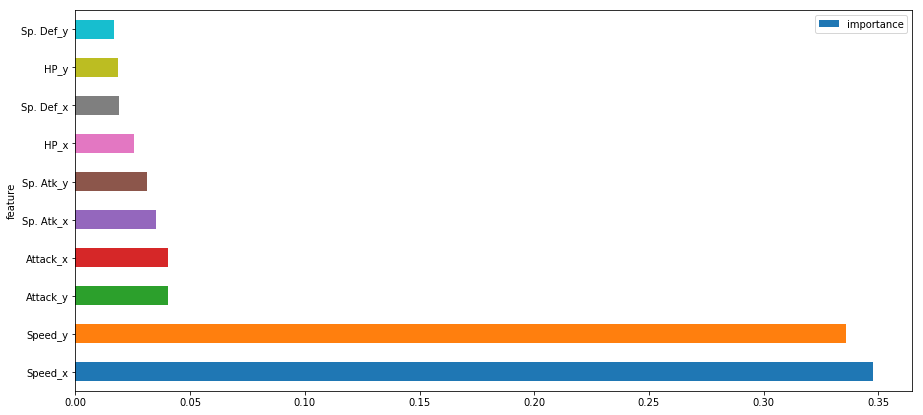

In [152]:
most_important.plot.barh(x='feature', y='importance', figsize=(15,7))

## Question 3: Ranking - 30 points
Something the new Pokedex is missing is a smart way of ranking the Pokémon. As the dataset Professor Oak gave you contains the outcome of a large number of battles, the idea is to use this data to come up with a way of sorting the Pokémon from strongest to weakest.
1. (5 points) Compute the winning ratio (number of wins divided by number of battles) for all Pokémon. Show the 10 Pokémon with the highest ratio and describe what they have in common with respect to their features. Discuss your results about feature importance from question 2.7 (regarding feature importance) in this context.

In [160]:
n_wins = combats.groupby('Winner').count()['First_pokemon']
##second pokemon contient maintenant le num de battles pour le premier, elle joue le role de counts
n_combats = combats.groupby('First_pokemon').count()['Second_pokemon'] + combats.groupby('Second_pokemon').count()['First_pokemon']
#combats_first_col = combats.groupby(['First_pokemon']).size().reset_index(name='counts')
win_ratio = n_wins/n_combats
pokemon['win_ratio'] = win_ratio
pokemon.sort_values(ascending=False, by=['win_ratio'])
pokemon.head(10)

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,Attack Defense Ratio,win_ratio
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False,1.000000,NaN
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False,0.984127,0.278195
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False,0.987952,0.380165
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False,0.813008,0.674242
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,False,1.209302,0.560000
5,6,Charmeleon,Fire,NaN,58,64,58,80,65,80,False,1.103448,0.491071
6,7,Charizard,Fire,Flying,78,84,78,109,85,100,False,1.076923,0.542373
7,8,Mega Charizard X,Fire,Dragon,78,130,111,130,85,100,False,1.171171,0.864662
8,9,Mega Charizard Y,Fire,Flying,78,104,78,159,115,100,False,1.333333,0.856115
9,10,Squirtle,Water,NaN,44,48,65,50,64,43,False,0.738462,0.844444


Pokémon tournaments can be represented as a so-called _dominance graph_. The dominance graph is a directed graph in which each Pokémon is represented by one vertex, and directed edges point from stronger to weaker Pokémons: in particular, if Pokémon _i_ has won a strictly larger number of times against Pokémon _j_ than _j_ has won against _i_ (that is, if _i_ dominates _j_), there is a directed edge pointing from node _i_ to node _j_. The dominance graph can be represented as an adjacency matrix _G_ where entry _G_<sub>_ij_</sub> is 1 if there is an edge pointing from _i_ to _j_, and 0 otherwise.

2. (10 points) A simple method for identifying the strongest Pokémon using this graph is to compute the matrix _A_ = _G_ + _G_<sup>2</sup>. Consider a given row of _A_; summing up all elements of that row results in a dominance score for the respective Pokémon. Explain what this score represents and why it may be interpreted as capturing the dominance of a Pokémon.
3. (7 points) Compute _A_ and extract the 10 Pokémon with the highest dominance score.
4. (3 points) Compare the ranking by dominance scores with the ranking by winning ratio (cf. subquestion 1 above). What do you observe? How do you explain the differences (if any)?
5. (5 points) Professor Oak is really keen on featuring a solid ranking mechanism in the new Pokedex, so you need to make a decision: Which scoring method is better, that based on winning ratio or that based on dominance scores? Support your opinion with explanations and examples.